<a href="https://colab.research.google.com/github/jimsjoo/gilbut_portfolio/blob/master/7%EC%9E%A5_%EC%9E%90%EC%82%B0%EB%B0%B0%EB%B6%84%EA%B3%BC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##7.2	머신러닝 맛보기, 선형회귀

In [ ]:
import numpy as np

In [ ]:
# x 값과 y값
x = np.array( [1, 2, 3 ] )
y = np.array( [3, 5, 7 ] )

In [ ]:
# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 2.0
y의 평균값: 5.0


In [ ]:
# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x])

In [ ]:
# 기울기 공식의 분자
# d = 0
# for i in range(len(x)):
#    d += (x[i] - mx) * (y[i] - my)

# dividend = d

dividend = sum([ (xi-mx)*(yi-my) for xi, yi in zip(x, y) ] )

In [ ]:
print("분모:", divisor)
print("분자:", dividend)

분모: 2.0
분자: 4.0


In [ ]:
# 기울기와 y 절편 구하기
W = dividend / divisor
b = my - (mx*W)

In [ ]:
# 출력으로 확인
print("기울기 W =", W)
print("y 절편 b =", b)

기울기 W = 2.0
y 절편 b = 1.0


In [ ]:
# 오차 
import numpy as np
# x 값과 y값
x = np.array( [1, 2, 3 ] )
y = np.array( [4, 7, 9 ] )
# 기울기 W, 절편 b
W = 2.0
b = 1.0
# x값을 주고 예측값(y_hat)을 구한다
for xi, yi in zip(x, y):
  y_hat = W * xi + b
  # 실제값(y)과 예측값(y_hat)이 오차이다
  err = yi - y_hat
  print('%.f = %.f - %.f ' % (err, yi, y_hat))

1 = 4 - 3 
2 = 7 - 5 
2 = 9 - 7 


In [ ]:
import numpy as np
# MSE 함수

def mse(y, y_hat):
   return ((y - y_hat) ** 2).mean()

# x 값과 y값
x = np.array([1, 2, 3 ])
y = np.array([4, 7, 9 ])
W = 2.0
b = 1.0
y_hat = []

for xi, yi in zip(x, y):
  y_hat.append( W * xi + b )

y_hat = np.array(y_hat)
mse_val = mse(y, y_hat) 
print('MSE = %.f' % (mse_val))

MSE = 3


###7.2.1	비용함수와 경사하강법

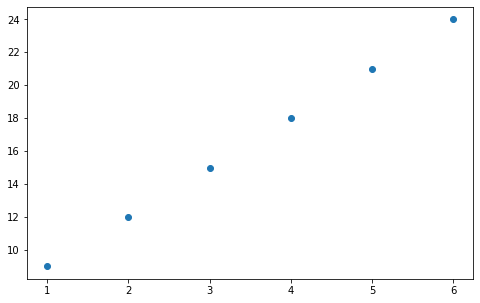

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([1., 2., 3., 4., 5., 6.])
y_data = np.array([9., 12., 15., 18., 21., 24.])
 
#그래프로 나타내 봅니다.
plt.figure(figsize=(8,5))
plt.scatter(x_data, y_data)
plt.show()

In [ ]:
#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸어 줍니다.(인덱스를 주어 하나씩 불러와 계산이 가능해 지도록 하기 위함입니다.)
# x_data = np.array(x)
# y_data = np.array(y)
 
# 기울기 W와 절편 b의 값을 초기화 합니다.
W = 0
b = 0
 
#학습률을 정합니다.
lr = 0.05 
 
#몇 번 반복될지를 설정합니다.(0부터 세므로 원하는 반복 횟수에 +1을 해 주어야 합니다.)
epochs = 1000 
 
#경사 하강법을 시작합니다.
for i in range(epochs): # epoch 수 만큼 반복
    y_hat = W * x_data + b  #y를 구하는 식을 세웁니다
    error = y_data - y_hat  #오차를 구하는 식입니다.
    W_diff = -(1/len(x_data)) * sum(x_data * (error)) # 오차함수를 a로 미분한 값입니다. 
    b_diff = -(1/len(x_data)) * sum(error)  # 오차함수를 b로 미분한 값입니다. 
    W = W - lr * W_diff  # 학습률을 곱해 기존의 a값을 업데이트합니다.
    b = b - lr * b_diff  # 학습률을 곱해 기존의 b값을 업데이트합니다.
    if i % 100 == 0:    # 100번 반복될 때마다 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, W, b))

epoch=0, 기울기=3.3250, 절편=0.8250
epoch=100, 기울기=3.4651, 절편=4.0088
epoch=200, 기울기=3.1860, 절편=5.2037
epoch=300, 기울기=3.0744, 절편=5.6816
epoch=400, 기울기=3.0297, 절편=5.8727
epoch=500, 기울기=3.0119, 절편=5.9491
epoch=600, 기울기=3.0048, 절편=5.9796
epoch=700, 기울기=3.0019, 절편=5.9919
epoch=800, 기울기=3.0008, 절편=5.9967
epoch=900, 기울기=3.0003, 절편=5.9987


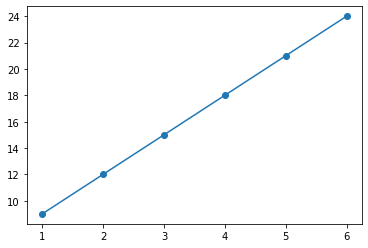

In [ ]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
y_pred = W * x_data + b
plt.scatter(x_data, y_data)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

###7.2.3	유클리드 거리

In [ ]:
# K최근접이웃 알고리즘
def euclidean_distance(pt1, pt2):
  distance = 0
  for i in range(len(pt1)):
    distance += (pt1[i] - pt2[i]) ** 2
  return distance ** 0.5

print(euclidean_distance([5, 4, 3], [1, 7, 9]))

7.810249675906654


In [ ]:
import math

def euclidean_distance(pt1, pt2):
  return math.sqrt(sum([(d1-d2)**2 for d1, d2 in zip(pt1,pt2)]))

print(euclidean_distance([5, 4, 3], [1, 7, 9]))  

7.810249675906654


###7.2.4	박쥐를 분류하는 K최근접이웃 알고리즘

In [ ]:
# Test distance function
# [x, y, type]
zoo = [
  [ 2.78 , 2.55 , 0 ],
	[ 1.46 , 2.36 , 0 ],
	[ 3.39 , 4.40 , 0 ],
	[ 1.38 , 1.85 , 0 ],
	[ 3.06 , 3.00 , 0 ],
	[ 7.62 , 2.75 , 1 ],
	[ 5.33 , 2.08 , 1 ],
	[ 6.92 , 1.77 , 1 ],
	[ 8.67 ,-0.24 , 1 ],
	[ 7.67 , 3.50 , 1 ] 
]

In [ ]:
bat = [3,4]

for animal in zoo:
	d = euclidean_distance(bat, animal)
	print(d)

1.4665946952038251
2.249711092562776
0.5586591089385372
2.6920066864701506
1.0017983829094554
4.786115335008132
3.0191555110659674
4.509911307331886
7.080007062143371
4.696690324047349


In [ ]:
distances = []

bat = [3,4]

for animal in zoo:
	d = euclidean_distance( bat, animal )
	distances.append( ( animal, d ) )

distances.sort( key=lambda tup: tup[1] )

k = 3
for i in range(k):  
  print(distances[i])

([3.39, 4.4, 0], 0.5586591089385372)
([3.06, 3.0, 0], 1.0017983829094554)
([2.78, 2.55, 0], 1.4665946952038251)


In [ ]:
# Locate the most similar neighbors
def get_neighbors(train, new_one, k):
	distances = []
	for t in train:
		d = euclidean_distance(new_one, t)	
		distances.append((t, d))
	distances.sort(key=lambda tup: tup[1])
	neighbors = []
	for i in range(k):
		neighbors.append(distances[i][0])
	return neighbors

k = 3
neighbors = get_neighbors(zoo, bat, k)
for neighbor in neighbors:
	print(neighbor)

[3.39, 4.4, 0]
[3.06, 3.0, 0]
[2.78, 2.55, 0]


##7.3	K-최근접이웃 알고리즘을 이용한 회귀

###7.3.1	라이브러리 임포트

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

###7.3.2	주가지수 데이터 가져오기

In [ ]:
symbol, source, start, end = 'SPY', 'yahoo', '2016-01-01', '2020-01-01'
df = web.DataReader(symbol, source, start, end)[['Open', 'High', 'Low', 'Close']]

# 또는
# df = web.DataReader('SPY', data_source='yahoo',start='2016-01-01', end='2020-01-01')[['Open', 'High', 'Low', 'Close']]

# 또는
# df = web.DataReader('SPY', data_source='yahoo',start='2016-01-01', end='2020-01-01')
# df = df[['Open', 'High', 'Low', 'Close']]
display(df.head(), df.tail())

,Open,High,Low,Close
Date,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004
2016-01-05,201.399994,201.899994,200.050003,201.360001
2016-01-06,198.339996,200.059998,197.600006,198.820007
2016-01-07,195.330002,197.440002,193.589996,194.050003
2016-01-08,195.190002,195.850006,191.580002,191.919998


,Open,High,Low,Close
Date,,,,
2019-12-24,321.470001,321.519989,320.899994,321.230011
2019-12-26,321.649994,322.950012,321.640015,322.940002
2019-12-27,323.739990,323.799988,322.279999,322.859985
2019-12-30,322.950012,323.100006,320.549988,321.079987
2019-12-31,320.529999,322.130005,320.149994,321.859985


###7.3.3	예측변수 설정

In [ ]:
df = df.dropna()
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2016-01-04,-0.529999,2.440002
2016-01-05,0.039993,1.849991
2016-01-06,-0.480011,2.459991
2016-01-07,1.279999,3.850006
2016-01-08,3.270004,4.270004


###7.3.4	목적변수 설정

In [ ]:
Y = np.where( df['Close'].shift(-1) > df['Close'],1,-1)
Y

array([ 1, -1, -1, ..., -1,  1, -1])

###7.3.5	데이터셋 분할

In [ ]:
train_pct = 0.7

split = int( train_pct*len(df) )

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

# 위의 코드는 간략하게
#X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

###7.3.6	KNN모델 설정

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('Train data Accuracy: %.2f' % accuracy_train)
print('Test  data Accuracy: %.2f' % accuracy_test)

Train data Accuracy: 0.59
Test  data Accuracy: 0.50


###7.3.7	모델을 바탕으로 전략 실행

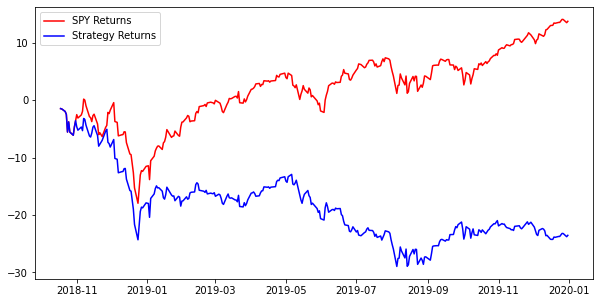

In [ ]:
df['Signal'] = knn.predict(X)
df['SPY_Returns'] = np.log(df['Close']/df['Close'].shift(1))
Cum_SPY_Returns = df[split:]['SPY_Returns'].cumsum()*100

df['STR_Returns'] = df['SPY_Returns']*df['Signal'].shift(1)
Cum_STR_Returns = df[split:]['STR_Returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cum_SPY_Returns, color='r', label='SPY Returns')
plt.plot(Cum_STR_Returns, color='b', label='Strategy Returns')
plt.legend()
plt.show()

###7.3.8	샤프비율 계산

In [ ]:
Std = Cum_STR_Returns.std()
Sharpe = (Cum_STR_Returns - Cum_SPY_Returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f' % Sharpe)

Sharpe ratio: -3.39


##7.4	로지스틱 회귀

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def sigmoid(x):
    v = []
    for item in x:
        v.append(1/(1+math.exp(-item)))
    return v

In [ ]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

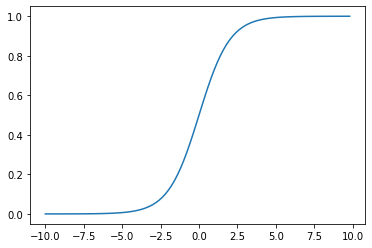

In [ ]:
plt.plot(x,sig)
plt.show()

###7.4.1	라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

###7.4.2	데이터 가져오기

In [ ]:
symbol, source, start, end = 'SPY', 'yahoo', '2016-01-01', '2020-01-01'
df = web.DataReader(symbol, source, start, end)[['Open', 'High', 'Low', 'Close']]
df = df.dropna()

###7.4.3	예측변수/독립변수 설정

In [ ]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['MA10'])

df['OpenClose'] = df['Open'] - df['Close'].shift(1)
df['OpenOpen'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df[['Open', 'High', 'Low', 'Close', 'MA10', 'Corr', 'OpenClose', 'OpenOpen']]

###7.4.4	목표변수/종속변수 설정

In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

###7.4.5	데이터셋 분할 

In [ ]:
train_pct = 0.7
split = int(train_pct * len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

###7.4.6	로지스틱 회귀모델 설정 및 훈련 

In [ ]:
model = LogisticRegression()
model = model.fit(X_train, y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[0.18200059268683258]
1,High,[-0.1132033056503593]
2,Low,[-0.1681570589711914]
3,Close,[0.0754754206884071]
4,MA10,[0.024284459058261952]
5,Corr,[-0.07054912838276667]
6,OpenClose,[-0.095957248468815]
7,OpenOpen,[0.0104387407963758]


###7.4.7	클래스 확률 예측

In [ ]:
len(X_test)

297

In [ ]:
probability = model.predict_proba(X_test)
print(probability)
predicted = model.predict(X_test)
print(predicted)

[[0.51321788 0.48678212]
 [0.33510325 0.66489675]
 [0.29490966 0.70509034]
 [0.45897911 0.54102089]
 [0.57070271 0.42929729]
 [0.46514312 0.53485688]
 [0.36280566 0.63719434]
 [0.46633302 0.53366698]
 [0.47853861 0.52146139]
 [0.54555197 0.45444803]
 [0.45346608 0.54653392]
 [0.36938576 0.63061424]
 [0.34767498 0.65232502]
 [0.47444983 0.52555017]
 [0.34763781 0.65236219]
 [0.37711378 0.62288622]
 [0.41418917 0.58581083]
 [0.30096197 0.69903803]
 [0.31264225 0.68735775]
 [0.47714719 0.52285281]
 [0.42936614 0.57063386]
 [0.5067006  0.4932994 ]
 [0.41423545 0.58576455]
 [0.47719411 0.52280589]
 [0.4444576  0.5555424 ]
 [0.49334276 0.50665724]
 [0.50841814 0.49158186]
 [0.30028631 0.69971369]
 [0.2637087  0.7362913 ]
 [0.30933958 0.69066042]
 [0.27216308 0.72783692]
 [0.36364324 0.63635676]
 [0.50153089 0.49846911]
 [0.40973491 0.59026509]
 [0.3345151  0.6654849 ]
 [0.29051168 0.70948832]
 [0.38257869 0.61742131]
 [0.39268633 0.60731367]
 [0.29257058 0.70742942]
 [0.33136955 0.66863045]


###7.4.8	모델평가

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[ 23 105]
 [ 25 144]]
              precision    recall  f1-score   support

          -1       0.48      0.18      0.26       128
           1       0.58      0.85      0.69       169

    accuracy                           0.56       297
   macro avg       0.53      0.52      0.48       297
weighted avg       0.54      0.56      0.50       297



In [ ]:
print(model.score(X_test,y_test))

0.5622895622895623


In [ ]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.56565657 0.54545455 0.56565657 0.55555556 0.56565657 0.57575758
 0.49494949 0.49494949 0.55102041 0.57142857]
0.54860853432282


###7.4.9	매매전략

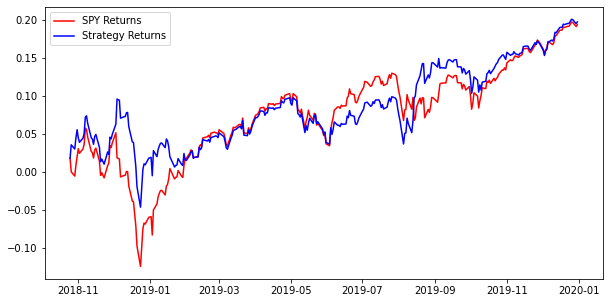

In [ ]:
df['Signal'] = model.predict(X)
df['SPY_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_returns = np.cumsum(df[split:]['SPY_returns'])

df['STR_returns'] = df['SPY_returns']* df['Signal'].shift(1)
Cumulative_STR_returns = np.cumsum(df[split:]['STR_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_STR_returns, color='b', label = 'Strategy Returns')
plt.legend()
plt.show()